In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\ProgramData\anaconda3\envs\python_code\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='job_posted_month',columns='job_title_short', aggfunc='size')
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


In [7]:
df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')
df_US_software_pivot 

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [9]:
df_US_merged = df_US_pivot.merge(df_US_software_pivot, on='job_posted_month')
df_US_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
December,648,40,3979,2641,3472,119,601,689,752,212,14033,9232,6731,4367
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980


In [ ]:
top_5 = (
    df_US_merged.
    sum().
    sort_values(ascending=False).
    head().
    index.  #Get the index of top 5
    to_list()
    )
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

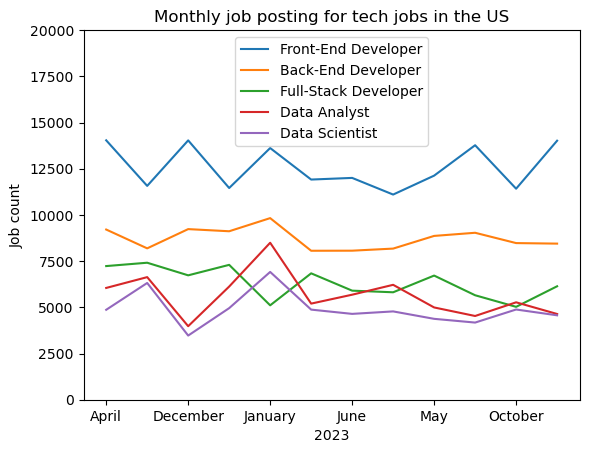

In [16]:
df_US_merged[top_5].plot(kind='line')
plt.title('Monthly job posting for tech jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job count')
plt.ylim(0,20000)
plt.legend()
plt.show()